<a href="https://colab.research.google.com/github/aldodec/Covid19-Mex/blob/master/Covid19MX_Datos_Completos_Mortalidad_Edad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from datetime import date
from scipy import stats

today = date.today()
print("Updated:", today)

Updated: 2020-04-20


[*datos*](https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico/resource/cc21b344-9f17-46c7-be3a-96bef1fb2dd0?inner_span=True)

https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico

In [0]:
file = '/content/drive/My Drive/200419COVID19MEXICO.csv'
df = pd.read_csv(file)

In [0]:
df['FECHA_INGRESO'] = pd.to_datetime(df['FECHA_INGRESO'])
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])

In [0]:
df.head() # Algunas claves son un misterio

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-19,09e8dc,2,9,15,1,15,15,37.0,2,2020-04-09,2020-03-28,9999-99-99,2,1,75,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,99,99,97,1
1,2020-04-19,1dd782,2,12,9,1,15,9,3.0,1,2020-04-16,2020-04-02,9999-99-99,97,2,31,1,2,2,2,2,2,2,2,2,2,1,2,2,2,2,99,99,97,97
2,2020-04-19,0efbaf,2,9,28,2,16,28,32.0,1,2020-04-06,2020-04-04,9999-99-99,97,2,22,1,97,2,2,2,2,2,2,2,2,2,2,2,1,1,99,99,97,97
3,2020-04-19,0e8ab4,2,12,9,2,99,9,13.0,1,2020-04-17,2020-04-15,9999-99-99,97,2,2,1,97,2,2,2,2,2,2,2,2,2,2,2,1,3,99,99,97,97
4,2020-04-19,013a6c,1,3,15,2,15,15,106.0,1,2020-04-16,2020-04-14,9999-99-99,97,2,26,1,97,2,2,2,2,2,2,2,2,1,2,2,1,3,99,99,97,97


In [0]:
# actualizado al '2020-04-19'

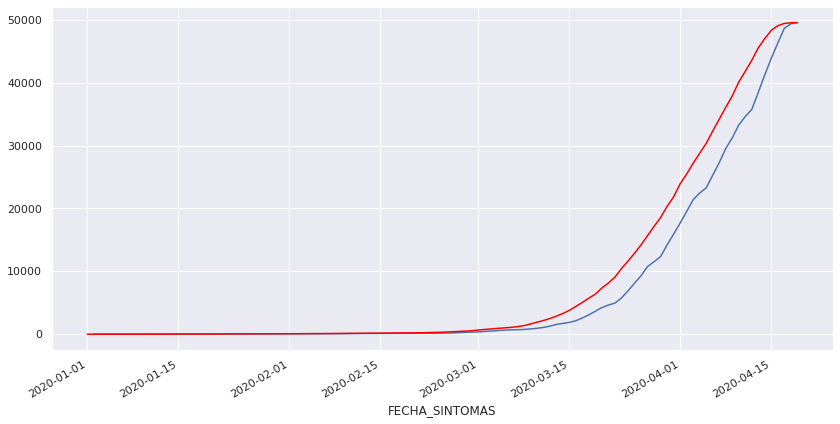

In [0]:
plt.figure(figsize=(14,7))
df.groupby('FECHA_INGRESO').count().cumsum()['ID_REGISTRO'].plot()
df.groupby('FECHA_SINTOMAS').count().cumsum()['ID_REGISTRO'].plot(color='red')
plt.show()

Según el diccionario, gente con 'RESULTADO' = 1, es confirmado con Covid

In [0]:
df = df[df['RESULTADO'] == 1]

Nos enfocamos en defunciones

In [0]:
df_deaths = df[df['FECHA_DEF'] != '9999-99-99']
df_deaths['FECHA_DEF'] = pd.to_datetime(df_deaths['FECHA_DEF'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


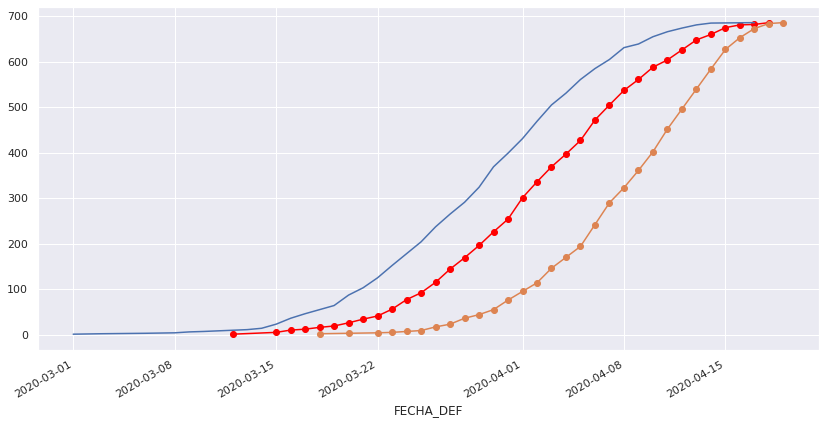

In [0]:
plt.figure(figsize=(14,7))
df_deaths.groupby('FECHA_INGRESO').count().cumsum()['ID_REGISTRO'].plot(color = 'red',marker='o')
df_deaths.groupby('FECHA_SINTOMAS').count().cumsum()['ID_REGISTRO'].plot()
df_deaths.groupby('FECHA_DEF').count().cumsum()['ID_REGISTRO'].plot(marker='o')

plt.show()

In [0]:
len(df_deaths) # Numero de muertes 

686

In [0]:
len(df_deaths)/len(df)

0.08304079409272486

In [0]:
df_deaths.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

Dias desde inicio de síntomas a muerte.

In [0]:
df['DIAS_SINT_DEF']=(df_deaths['FECHA_DEF']-df_deaths['FECHA_SINTOMAS']).dt.days

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df[df['DIAS_SINT_DEF']==2]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,DIAS_SINT_DEF
5309,2020-04-19,06231d,1,6,9,1,99,9,15.0,2,2020-04-08,2020-04-08,2020-04-10,2,1,53,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,99,99,97,2,2.0
6348,2020-04-19,1d5760,1,4,8,2,8,8,37.0,2,2020-04-01,2020-04-01,2020-04-03,2,1,45,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,México,97,2,2.0
9413,2020-04-19,0d6b1e,2,4,9,2,99,9,3.0,2,2020-03-29,2020-03-29,2020-03-31,2,1,41,1,97,2,1,2,2,2,1,2,2,1,1,2,99,1,99,México,97,2,2.0
9965,2020-04-19,1785dd,2,12,17,1,17,17,28.0,2,2020-04-11,2020-04-11,2020-04-13,2,1,74,1,2,2,1,2,2,2,2,2,2,2,2,2,2,1,99,99,97,2,2.0
12406,2020-04-19,1270cd,1,6,9,2,15,15,58.0,1,2020-04-13,2020-04-13,2020-04-15,97,2,48,1,97,2,1,2,2,2,2,2,2,2,2,2,1,1,99,99,97,97,2.0
16063,2020-04-19,08a350,2,4,9,2,99,15,58.0,1,2020-04-15,2020-04-14,2020-04-16,97,1,63,1,97,2,1,2,2,2,1,2,2,1,2,2,99,1,99,México,97,97,2.0
17199,2020-04-19,0c91fe,1,4,15,2,15,15,122.0,1,2020-04-01,2020-04-01,2020-04-03,97,1,51,1,97,2,2,2,2,2,1,2,2,2,1,2,99,1,99,México,97,97,2.0
18757,2020-04-19,0253e4,1,6,9,1,99,9,15.0,2,2020-04-05,2020-04-05,2020-04-07,2,1,70,1,2,2,2,2,2,2,1,1,2,1,2,2,99,1,99,99,97,2,2.0
19418,2020-04-19,179dcd,1,12,9,2,20,15,31.0,2,2020-04-11,2020-04-10,2020-04-12,1,1,65,1,97,2,2,2,2,2,2,2,2,2,2,2,2,1,99,99,97,2,2.0
23677,2020-04-19,1b9e59,1,4,18,2,18,18,1.0,2,2020-04-12,2020-04-10,2020-04-12,2,1,80,1,97,2,2,2,2,2,1,1,1,1,2,1,99,1,99,México,97,2,2.0


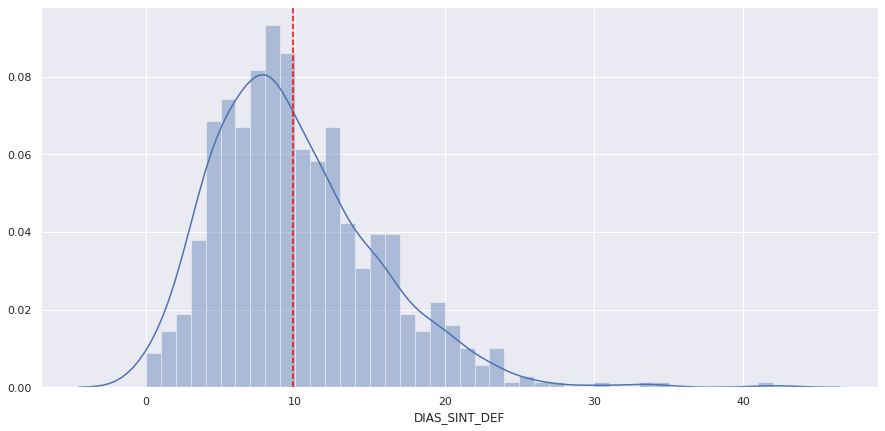

In [0]:
plt.figure(figsize=(15,7))
sns.distplot(df['DIAS_SINT_DEF'],bins = 42,kde=True)
plt.axvline(df['DIAS_SINT_DEF'].mean(),c='red',ls='--')
plt.show()

In [0]:
fit_alpha, fit_loc, fit_beta=stats.gamma.fit(df['DIAS_SINT_DEF'].dropna())
print(fit_alpha, fit_loc, fit_beta)

4.902807396505899 -2.1263525511456085 2.4424266569649538


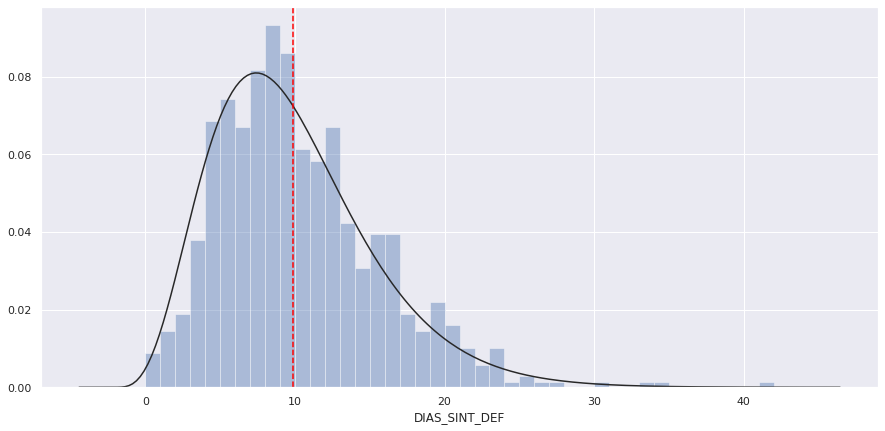

In [0]:
plt.figure(figsize=(15,7))
sns.distplot(df['DIAS_SINT_DEF'],bins = 42,kde=False, fit=stats.gamma)
plt.axvline(df['DIAS_SINT_DEF'].mean(),c='red',ls='--')
plt.show()

In [0]:
(df_deaths['FECHA_DEF']-df_deaths['FECHA_SINTOMAS']).dt.days.describe()

count    686.000000
mean       9.848397
std        5.458300
min        0.000000
25%        6.000000
50%        9.000000
75%       13.000000
max       42.000000
dtype: float64

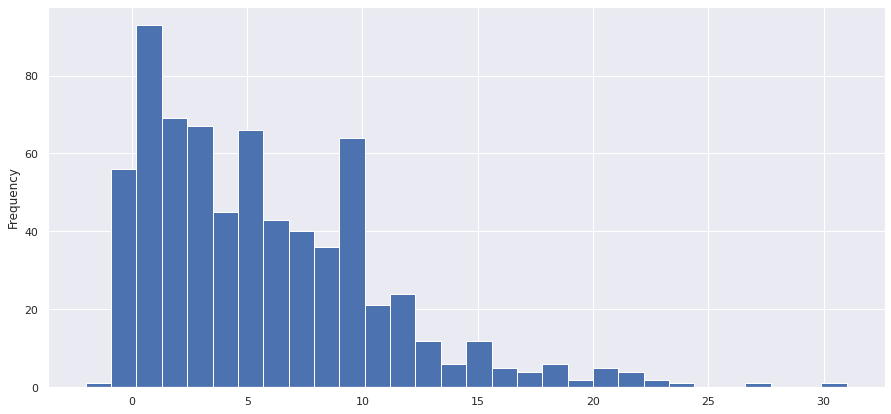

In [0]:
plt.figure(figsize=(15,7))
(df_deaths['FECHA_DEF']-df_deaths['FECHA_INGRESO']).dt.days.plot(kind = 'hist',bins = 30)
plt.show()

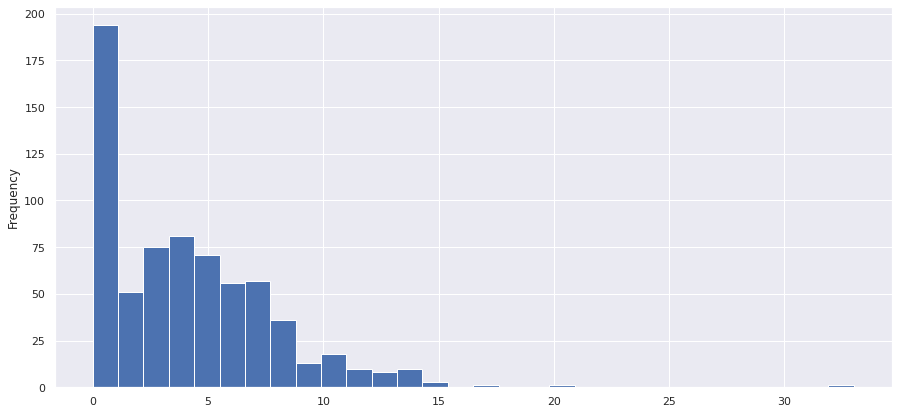

In [0]:
plt.figure(figsize=(15,7))
(df_deaths['FECHA_INGRESO']-df_deaths['FECHA_SINTOMAS']).dt.days.plot(kind = 'hist',bins = 30)
plt.show()

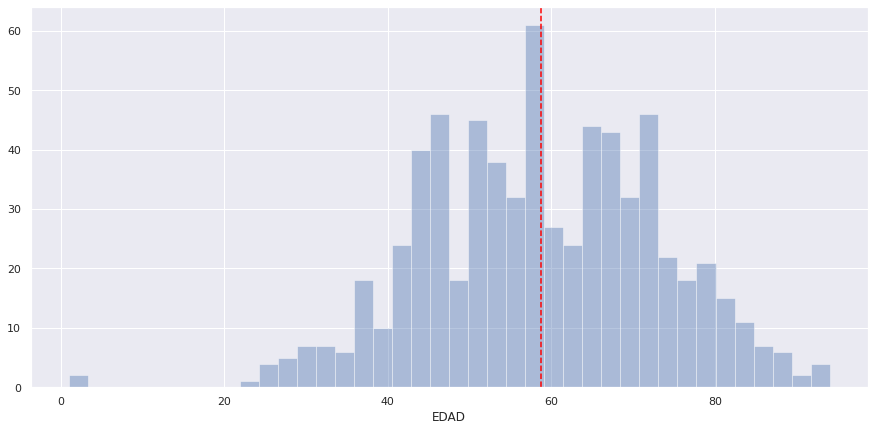

In [0]:
plt.figure(figsize=(15,7))
sns.distplot(df_deaths['EDAD'],bins = 40,kde = False)
plt.axvline(df_deaths['EDAD'].mean(),color = 'red',ls = '--')
plt.show()

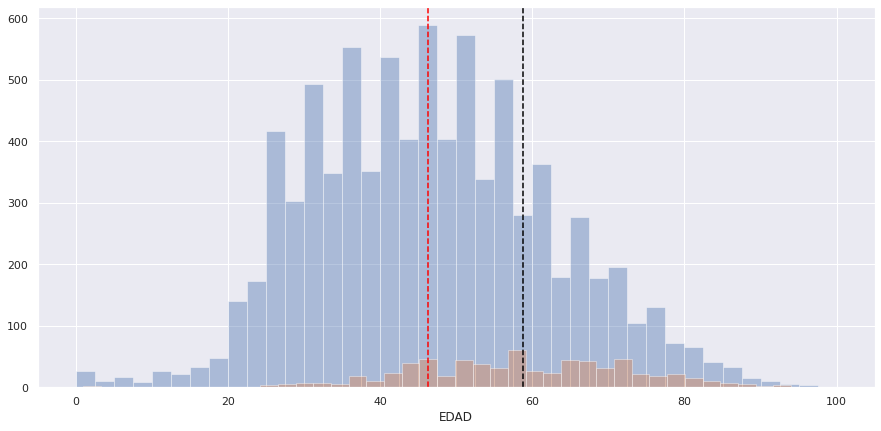

In [0]:
plt.figure(figsize=(15,7))
sns.distplot(df['EDAD'],bins = 40,kde = False)
plt.axvline(df['EDAD'].mean(),color = 'red',ls = '--')
sns.distplot(df_deaths['EDAD'],bins = 40,kde = False)
plt.axvline(df_deaths['EDAD'].mean(),color = 'black',ls = '--')
plt.show()

In [0]:
df_deaths['EDAD'].describe()

count    1288.000000
mean       58.090839
std        18.461669
min         0.000000
25%        47.000000
50%        59.000000
75%        71.000000
max        94.000000
Name: EDAD, dtype: float64

In [0]:
len(df_deaths)/len(df)

0.08304079409272486

In [0]:
df_deaths.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [0]:
len(df[df['INTUBADO']==1])

378

In [0]:
len(df_deaths[df_deaths['INTUBADO']==1])

169

In [0]:
len(df_deaths[df_deaths['INTUBADO']==1])/len(df[df['INTUBADO']==1]) # prob de morir si eres entubado

0.4470899470899471

In [0]:
len(df_deaths[df_deaths['UCI']==1])/len(df[df['UCI']==1]) # prob de morir si eres entubado

0.36432160804020103

In [0]:
edad = [i for i in df['EDAD'].unique()]
cfr = [len(df_deaths[df_deaths['EDAD']==i])/len(df[df['EDAD']==i]) for i in df['EDAD'].unique()]

cfr = pd.DataFrame({'Edad':edad, 'CFR':cfr})
cfr = cfr.sort_values('Edad')

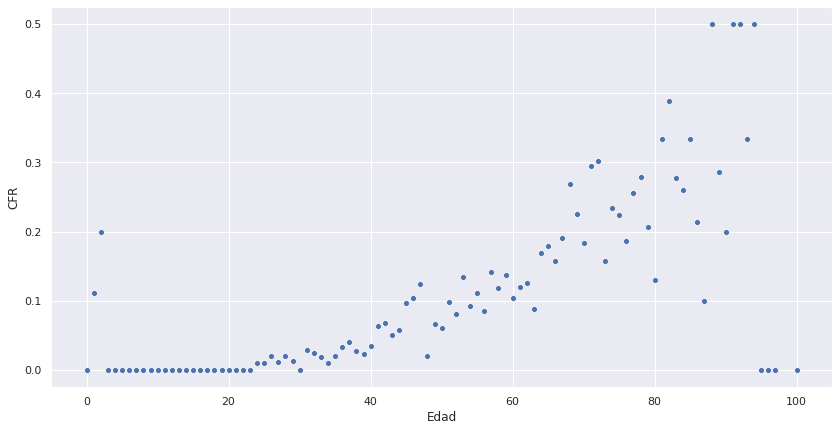

In [0]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = cfr['Edad'],y = cfr['CFR'])
plt.show()

In [0]:
cfr_0 = cfr.replace(0,0.001)

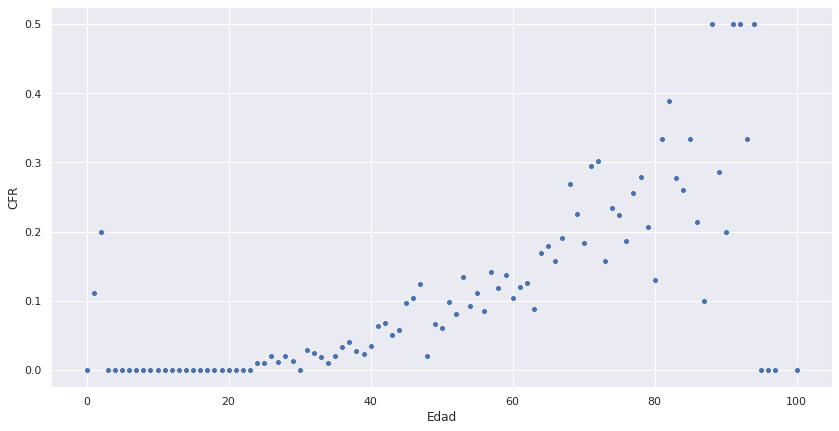

In [0]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = cfr_0['Edad'],y = cfr['CFR'])
plt.show()

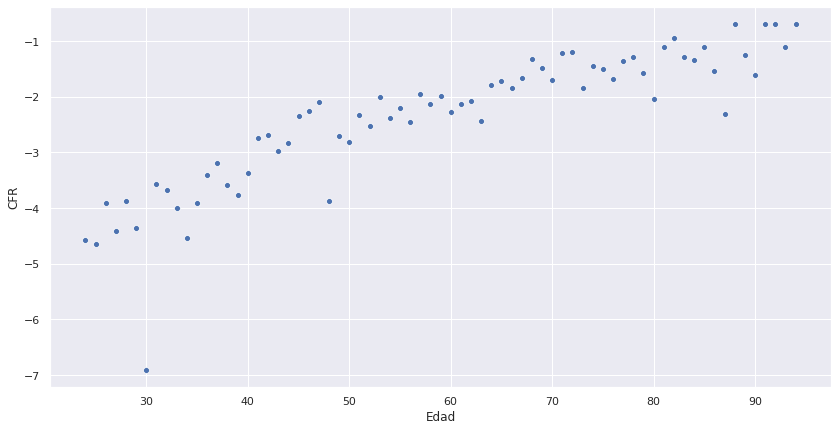

In [0]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = cfr_0['Edad'][24:95],y = np.log(cfr_0['CFR'])[24:95])
plt.show()

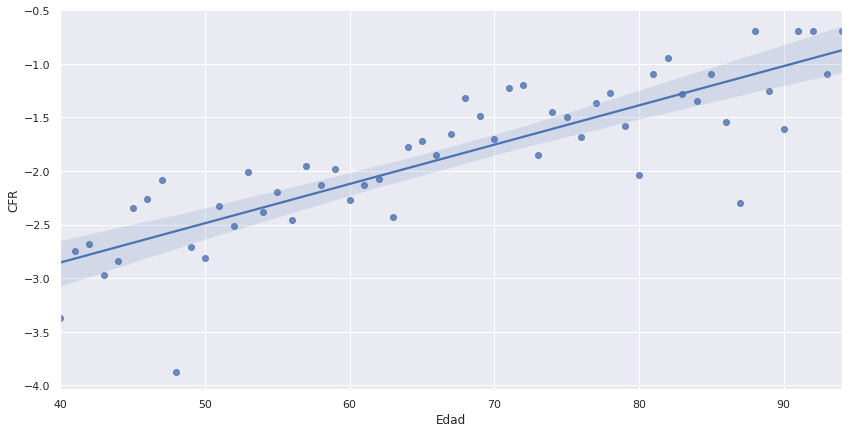

In [0]:
plt.figure(figsize=(14,7))
sns.regplot(x = cfr_0['Edad'][40:95],y = np.log(cfr_0['CFR'])[40:95])
plt.show()

In [0]:
edad_agg = [(((5*i)+5)-2.5) for i in range(20)]
cfr_agg = [cfr[(cfr['Edad']>=(5*i)) & (cfr['Edad']<((5*i)+5))]['CFR'].mean() for i in range(20)]

cfr_agg = pd.DataFrame({'CFR':cfr_agg,'Edad':edad_agg})
cfr_agg = cfr_agg.replace(0,0.0001)

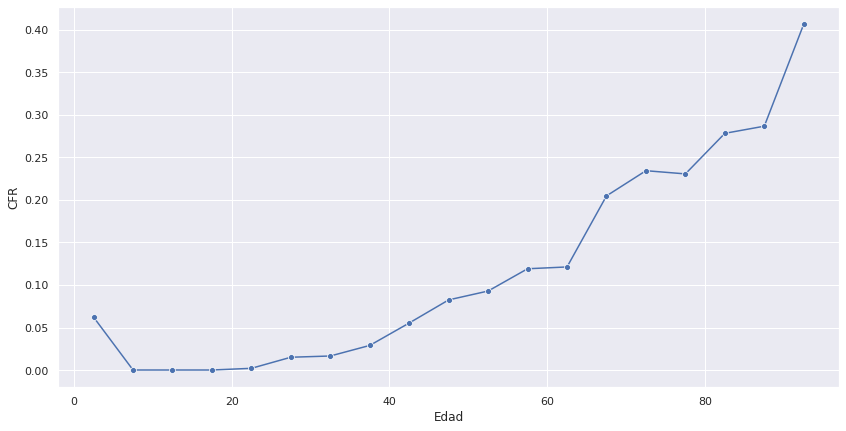

In [0]:
plt.figure(figsize=(14,7))
sns.lineplot(x = cfr_agg['Edad'][:-1],y = cfr_agg['CFR'][:-1],marker='o')
plt.show()

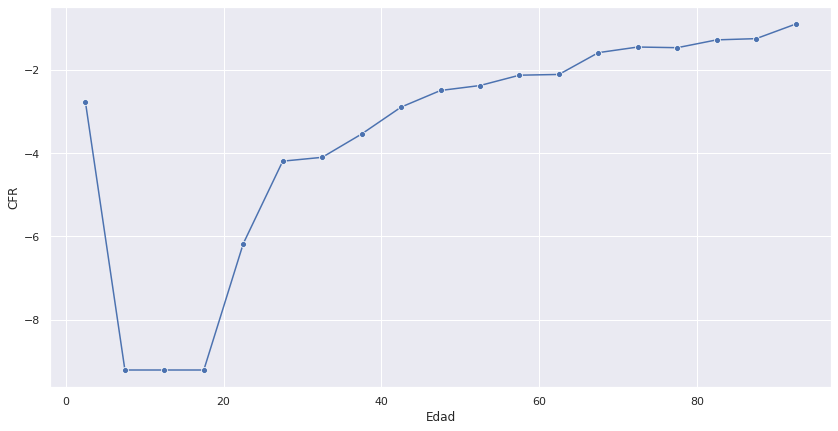

In [0]:
plt.figure(figsize=(14,7))
sns.lineplot(x = cfr_agg['Edad'][:-1],y = np.log(cfr_agg['CFR'])[:-1],marker = 'o')
plt.show()

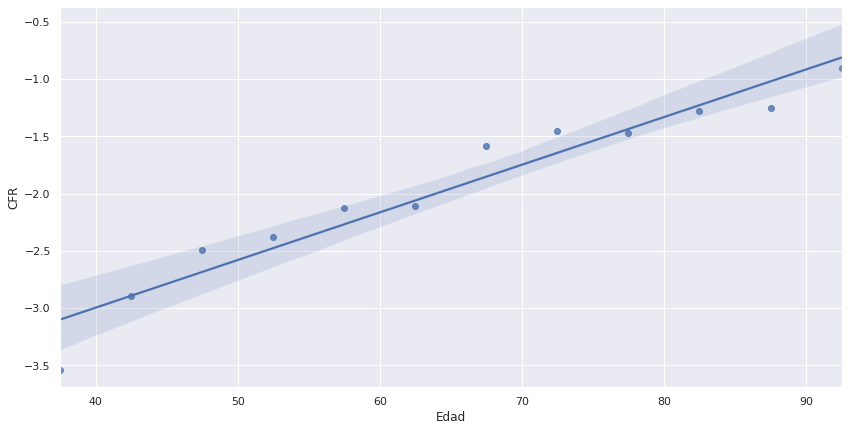

In [0]:
plt.figure(figsize=(14,7))
sns.regplot(x = cfr_agg['Edad'][7:-1],y = np.log(cfr_agg['CFR'])[7:-1],marker = 'o')
plt.show()

In [0]:
df['SEXO'].value_counts(1)

2    0.579712
1    0.420288
Name: SEXO, dtype: float64

In [0]:
df_m = df[df['SEXO']==2]
df_deaths_m = df_deaths[df_deaths['SEXO']==2]

In [0]:
edad = [i for i in df_m['EDAD'].unique()]
cfr_m = [len(df_deaths_m[df_deaths_m['EDAD']==i])/len(df_m[df_m['EDAD']==i]) for i in df_m['EDAD'].unique()]

cfr_m = pd.DataFrame({'Edad':edad, 'CFR':cfr_m})
cfr_m = cfr_m.sort_values('Edad')

In [0]:
df_f = df[df['SEXO']==1]
df_deaths_f = df_deaths[df_deaths['SEXO']==1]

In [0]:
edad = [i for i in df_f['EDAD'].unique()]
cfr_f = [len(df_deaths_f[df_deaths_f['EDAD']==i])/len(df_f[df_f['EDAD']==i]) for i in df_f['EDAD'].unique()]

cfr_f = pd.DataFrame({'Edad':edad, 'CFR':cfr_f})
cfr_f = cfr_f.sort_values('Edad')

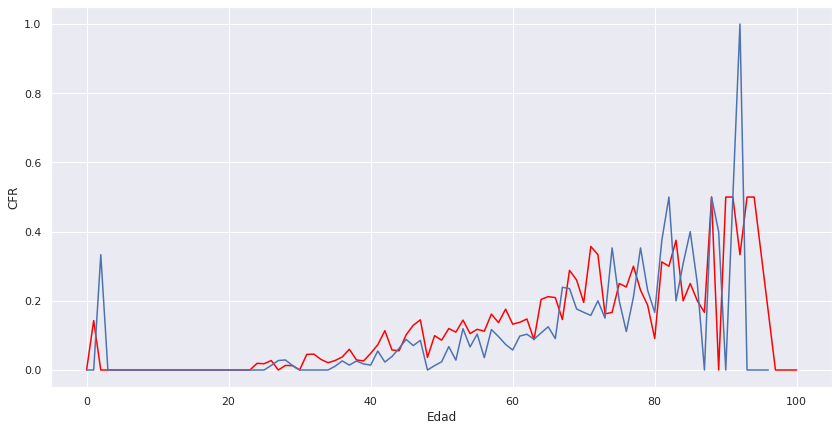

In [0]:
plt.figure(figsize=(14,7))
sns.lineplot(x = cfr_m['Edad'],y = cfr_m['CFR'],color = 'red')
sns.lineplot(x = cfr_f['Edad'],y = cfr_f['CFR'])
plt.show()

In [0]:
edad_agg_m = [(((5*i)+5)-2.5) for i in range(20)]
cfr_agg_m = [cfr_m[(cfr_m['Edad']>=(5*i)) & (cfr_m['Edad']<((5*i)+5))]['CFR'].mean() for i in range(20)]

cfr_agg_m = pd.DataFrame({'CFR':cfr_agg_m,'Edad':edad_agg_m})
cfr_agg_m = cfr_agg_m.replace(0,0.0001)

In [0]:
edad_agg_f = [(((5*i)+5)-2.5) for i in range(20)]
cfr_agg_f = [cfr_f[(cfr_f['Edad']>=(5*i)) & (cfr_f['Edad']<((5*i)+5))]['CFR'].mean() for i in range(20)]

cfr_agg_f = pd.DataFrame({'CFR':cfr_agg_f,'Edad':edad_agg_f})
cfr_agg_f = cfr_agg_f.replace(0,0.0001)

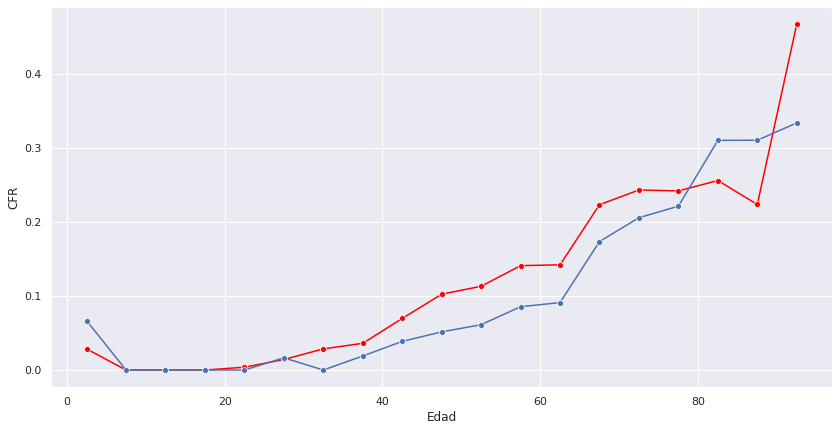

In [0]:
plt.figure(figsize=(14,7))
sns.lineplot(x = cfr_agg_m['Edad'][:-1],y = cfr_agg_m['CFR'][:-1],marker='o',color = 'red')
sns.lineplot(x = cfr_agg_f['Edad'][:-1],y = cfr_agg_f['CFR'][:-1],marker='o')
plt.show()

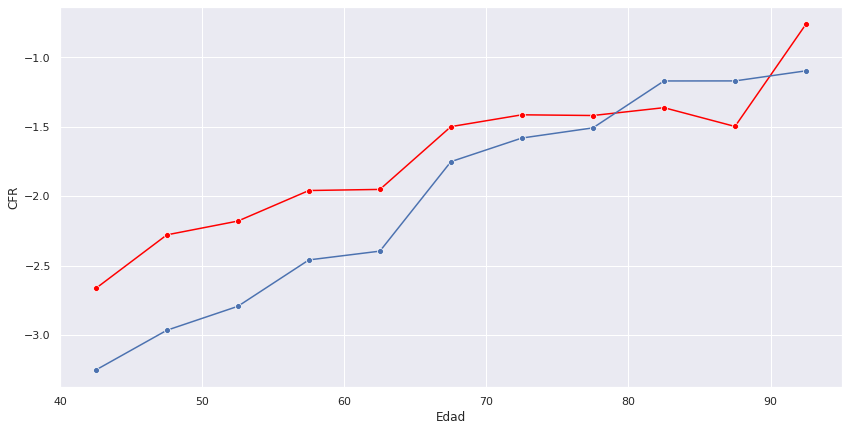

In [0]:
plt.figure(figsize=(14,7))
sns.lineplot(x = cfr_agg_m['Edad'][8:-1],y = np.log(cfr_agg_m['CFR'][8:-1]),marker='o',color = 'red')
sns.lineplot(x = cfr_agg_f['Edad'][8:-1],y = np.log(cfr_agg_f['CFR'][8:-1]),marker='o')
plt.show()

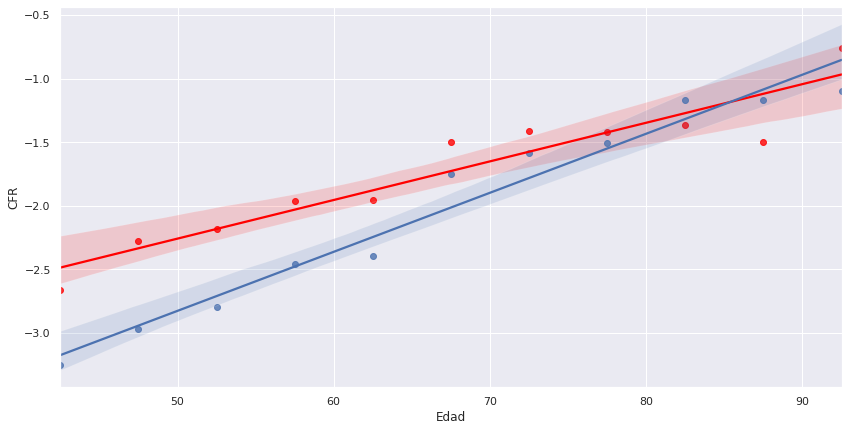

In [0]:
plt.figure(figsize=(14,7))
sns.regplot(x = cfr_agg_m['Edad'][8:-1],y = np.log(cfr_agg_m['CFR'][8:-1]),marker='o',color = 'red')
sns.regplot(x = cfr_agg_f['Edad'][8:-1],y = np.log(cfr_agg_f['CFR'][8:-1]),marker='o')
plt.show()

In [0]:
len(df_deaths)

686